In [1]:
install.packages(c("ggplot2", "dplyr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
file = "/content/mtcars.csv"
carData = read.csv(file, header = TRUE, row.names = 1, stringsAsFactors = FALSE)

In [5]:
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...


Converting categorical columns to represent factor levels

In [6]:
cat_cols = c('cyl', 'vs', 'am', 'gear', 'carb')
carData[cat_cols] = lapply(carData[cat_cols], as.factor)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: Factor w/ 3 levels "3","4","5": 2 2 2 1 1 1 1 2 2 2 ...
 $ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...


In [7]:
head(carData, 5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


In [8]:
# Ideal population model for mpg as output variable vs. hp as input variable
model_ideal = nls(data = carData, mpg ~ (1 / hp) * a + b * hp, start = list(a = 1, b = 1))
calcmpgIdeal = function(hp){
  return(predict(model_ideal, list(hp = hp)))
}

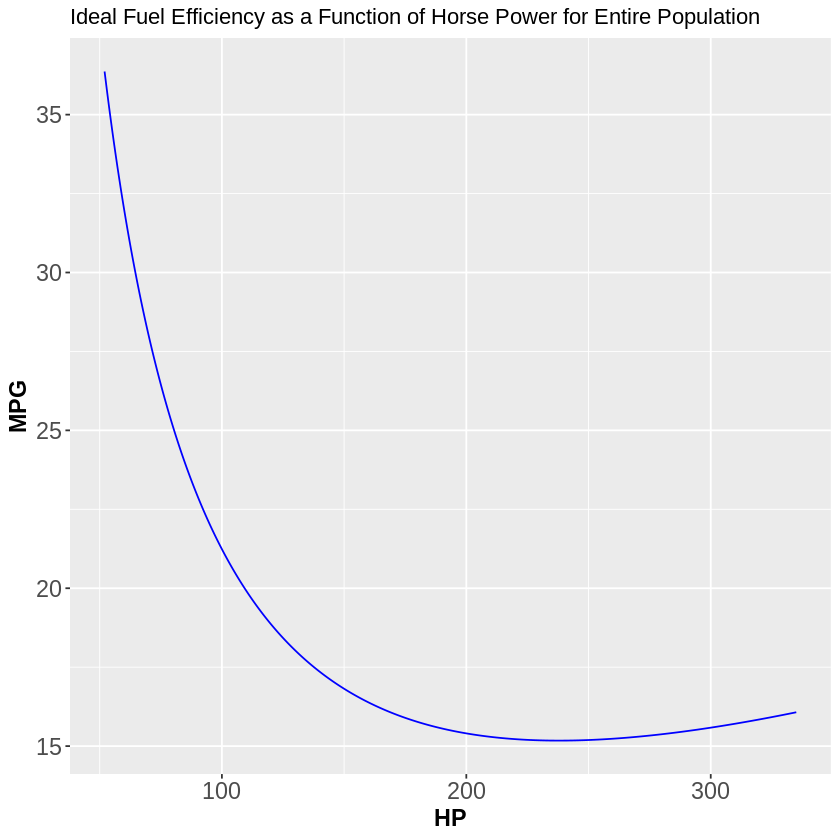

In [9]:
# Calculating and plotting the ideal mpg vs. hp for entire population
hp_population = seq(min(carData$hp), max(carData$hp), by = 0.1)
mpg_population_ideal = calcmpgIdeal(hp_population) # using the function here
carDataPopIdeal = data.frame(hp_population, mpg_population_ideal)
colnames(carDataPopIdeal) = c('hpPopulation', 'mpgPopulationIdeal')

ggplot(data = carDataPopIdeal, aes(x = hpPopulation, y = mpgPopulationIdeal)) +
   geom_line(color = 'blue') +
   labs(x = 'HP', y = 'MPG') +
   ggtitle("Ideal Fuel Efficiency as a Function of Horse Power for Entire Population") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

The above figure is the ideal relationship between hp and mpg.
--------
But in reality due to `random error term` adding some noise, we have true relationship.

Note: We may never be able to accurately measure the noise.

In [10]:
# Predictor noise
noise_internal = rnorm(length(hp_population), mean = 0, sd = 0.05)

# Response noise
noise_external = rnorm(length(hp_population), mean = 0, sd = 1)

In [11]:
# Real (noisy) population data
mpg_population_noisy = calcmpgIdeal(hp_population + noise_internal)  + noise_external
carDataPopNoisy = data.frame(hp_population, mpg_population_noisy)
colnames(carDataPopNoisy) = c('hpPopulation', 'mpgPopulationNoisy')

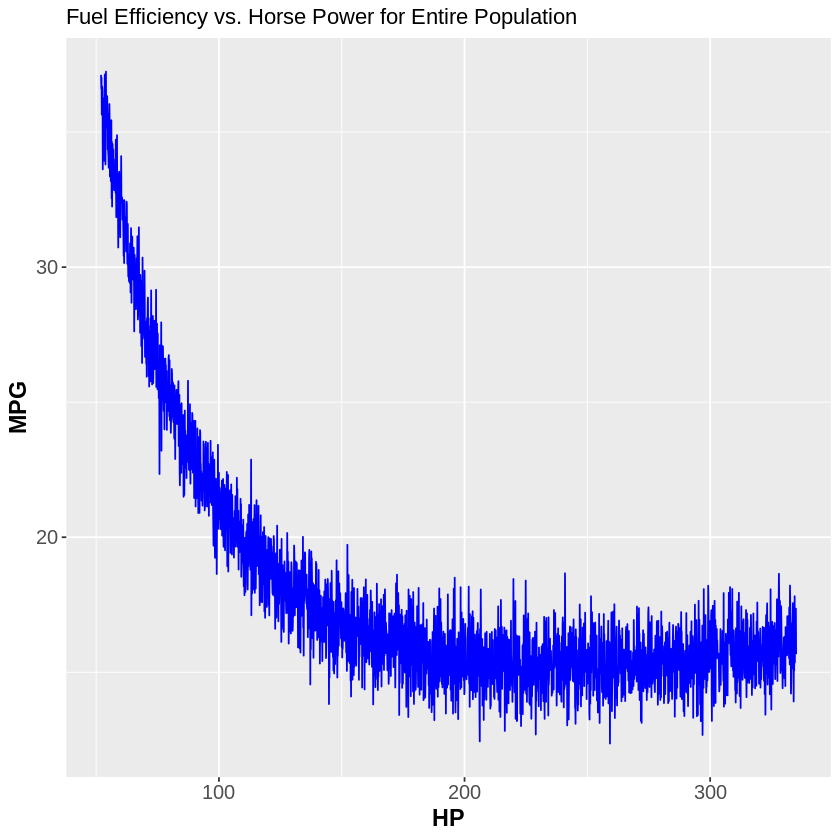

In [12]:
# Plot noisy mpg vs. hp for entire population
ggplot(data = carDataPopNoisy, aes(x = hpPopulation, y = mpgPopulationNoisy)) +
   geom_line(color = 'blue') +
   labs(x = 'HP', y = 'MPG') +
   ggtitle('Fuel Efficiency vs. Horse Power for Entire Population') +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))

This is what the true relationship between mpg and hp looks like because of random noise.

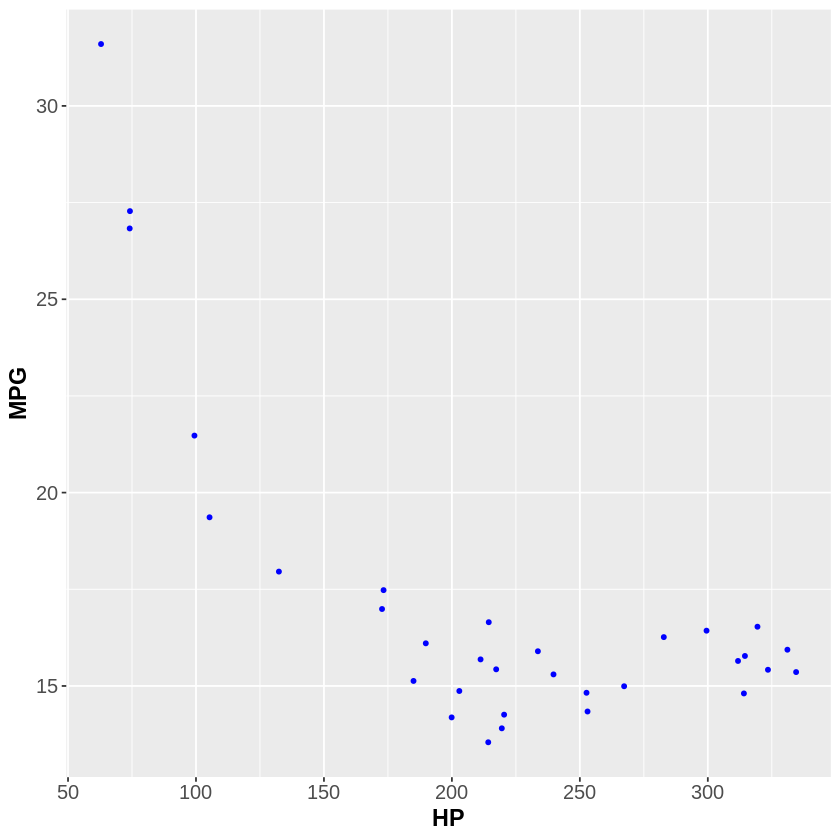

In [13]:
# Sample from a population of cars from the fuel efficiency mtcars dataset
nsamples = 32
carDataSample = carDataPopNoisy[sample(nrow(carDataPopNoisy), nsamples), ]
colnames(carDataSample) = c('hp', 'mpg')

ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Fuel Efficiency vs. Horse Power for Random Samples") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))

In [16]:
# Population data
mu_father = 65 # mean of father heights
sigma_father = 4 # standard deviation of father heights
popsize = 1e5 # population size
fatherHeights = rnorm(popsize, mean = mu_father, sd = sigma_father)

dfHeights = as.data.frame(fatherHeights)
colnames(dfHeights) = c('FatherHeight')

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


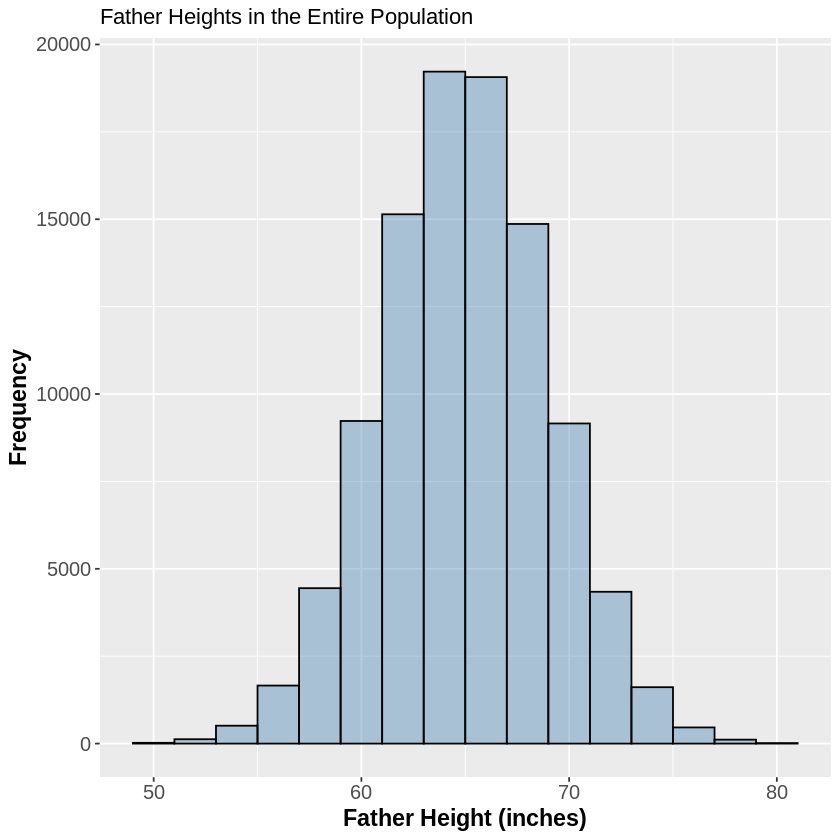

In [17]:
# Plot the frequency histogram for father heights
delta = 2.0 # bin width for histogram
ggplot(data = dfHeights) +
  geom_histogram(aes(x = FatherHeight, y = ..count..),
  breaks = seq(mu_father-4*sigma_father, mu_father+4*sigma_father, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  labs(x = 'Father Height (inches)', y = 'Frequency')+
  ggtitle('Father Heights in the Entire Population') +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))

In [18]:
# Population mean of father's heights
mean(fatherHeights)

[1] 64.96646

In [19]:
# Drawing random samples from the population
sample(10,10) #sample from 1-10, 10 values

[1]  5  2  7  3  8  4  9  1 10  6

In [20]:
# similarly, we get row numbers sorresponding to the 32 random fathers
n = 32
sample(nrow(dfHeights), n)

[1] 15429 63558 22924 69115 74384 18256 89232 53794 53568 46948 43559 94334
[13] 47075 13388 93070 82168 29799 24775 98473 65063 92149 65797  5524 44628
[25] 54642 62996 69661  1655 28349 34745 10244 28179

In [21]:
# we go to each one of those row and..
# get the value from FatherHeight column
dfHeights[sample(nrow(dfHeights), n), "FatherHeight"]

[1] 67.81085 64.45109 68.55759 67.82144 64.60726 66.97832 66.14795 60.58657
 [9] 59.36473 64.01690 65.45322 68.65363 60.05988 64.62350 63.12174 61.75080
[17] 65.16130 66.91825 70.59022 63.60144 73.36703 61.76107 72.38087 61.42196
[25] 73.81508 59.56545 67.27612 68.57152 55.95691 59.52940 65.93879 63.83525

In [22]:
# mean of the randomly choosen fathers
mean(dfHeights[sample(nrow(dfHeights), n), "FatherHeight"])

[1] 64.38959

In [23]:
# trying one more time to see the changes
dfHeights[sample(nrow(dfHeights), n), "FatherHeight"]
mean(dfHeights[sample(nrow(dfHeights), n), "FatherHeight"])

[1] 63.39696 70.89882 63.64637 61.51343 67.57698 63.88872 63.62069 68.83918
 [9] 65.33293 68.21841 71.84405 62.20662 67.23721 64.10192 67.48612 64.79099
[17] 59.31530 65.00134 64.78054 68.81227 59.08687 69.00997 62.53467 64.40740
[25] 65.75135 73.38498 60.80731 60.35888 69.35010 70.59779 55.79797 66.07914

[1] 66.00784

Plotting the frequency histogram for father heights

In [24]:
# Sample from a population of father heights
n = 32
fatherHeightsSample = dfHeights[sample(nrow(dfHeights), n), 'FatherHeight']
dfHeightsSample = as.data.frame(fatherHeightsSample)
colnames(dfHeightsSample) = c('FatherHeight')

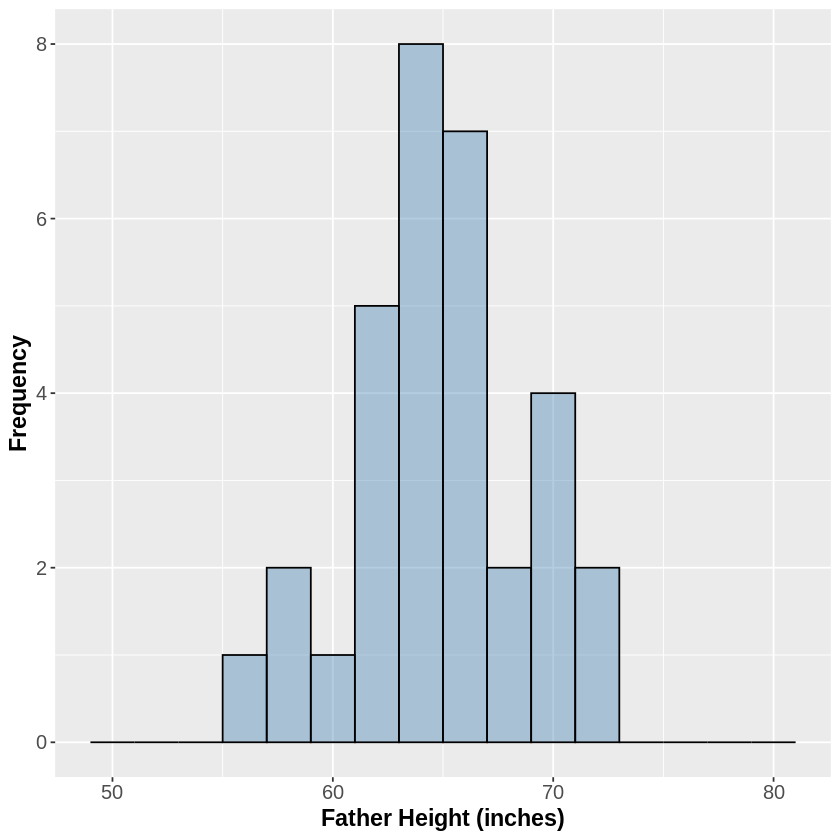

In [25]:
# Plotting the frequency histogram for father heights
delta = 2.0 # bin width for histogram
ggplot(data = dfHeightsSample) +
  geom_histogram(aes(x = FatherHeight, y = ..count..),
  breaks = seq(mu_father-4*sigma_father, mu_father+4*sigma_father, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  labs(x = 'Father Height (inches)', y = 'Frequency')+
  #ggtitle('Father Heights in a Sample of Size 32 Drawn from the Population') +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))

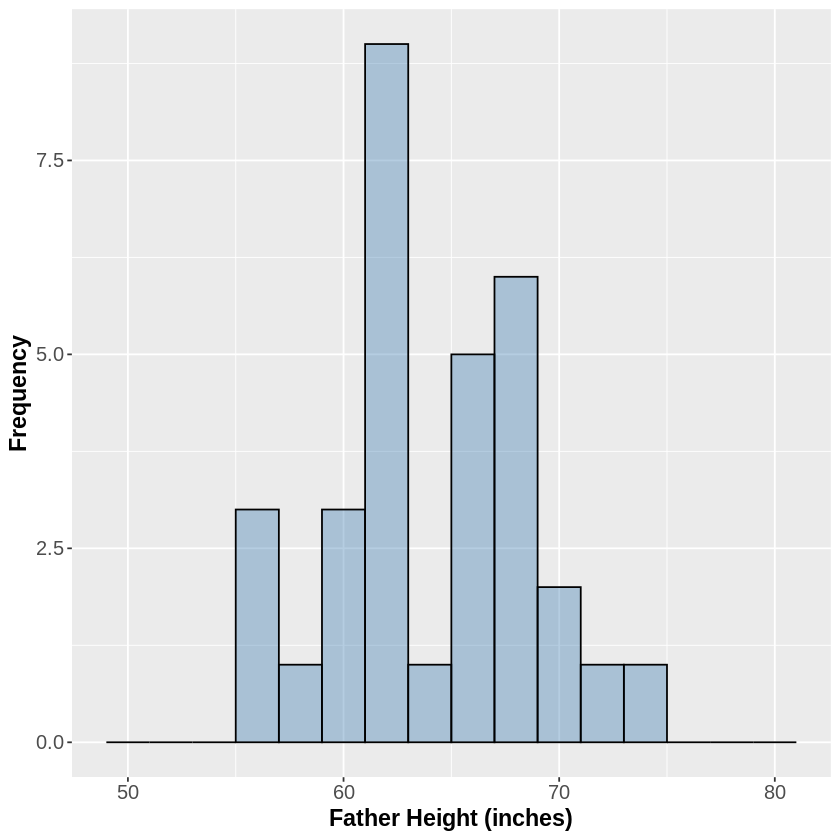

In [26]:
# combining both and trying again to see changes
n = 32
fatherHeightsSample = dfHeights[sample(nrow(dfHeights), n), 'FatherHeight']
dfHeightsSample = as.data.frame(fatherHeightsSample)
colnames(dfHeightsSample) = c('FatherHeight')

delta = 2.0 # bin width for histogram
ggplot(data = dfHeightsSample) +
  geom_histogram(aes(x = FatherHeight, y = ..count..),
  breaks = seq(mu_father-4*sigma_father, mu_father+4*sigma_father, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  labs(x = 'Father Height (inches)', y = 'Frequency')+
  #ggtitle('Father Heights in a Sample of Size 32 Drawn from the Population') +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))